In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from math import log
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# from xgboost.sklearn import XGBClassifier

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/diabetes.csv")
dataset

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [ ]:
AccDict={}

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [ ]:
dataset.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [ ]:

labels,counts =  pd.factorize(dataset['Gender'])
print(counts)
labels,counts =  pd.factorize(dataset['class'])
print(counts)
label,counts = pd.factorize(dataset['weakness'])
print(counts)
labels,counts =  pd.factorize(dataset['Polyuria'])
print(counts)


Index(['Male', 'Female'], dtype='object')
Index(['Positive', 'Negative'], dtype='object')
Index(['Yes', 'No'], dtype='object')
Index(['No', 'Yes'], dtype='object')


In [ ]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in dataset.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(dataset[col].unique())

    # Transform the column using the encoder
    dataset[col] = label_encoder.transform(dataset[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {dataset[col].unique()}")

Gender: [1 0]
Polyuria: [0 1]
Polydipsia: [1 0]
sudden weight loss: [0 1]
weakness: [1 0]
Polyphagia: [0 1]
Genital thrush: [0 1]
visual blurring: [0 1]
Itching: [1 0]
Irritability: [0 1]
delayed healing: [1 0]
partial paresis: [0 1]
muscle stiffness: [1 0]
Alopecia: [1 0]
Obesity: [1 0]
class: [1 0]


In [ ]:
dataset.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [ ]:
dataset['class'] = dataset['class'].replace(['DbD\t'],'DbD')
dataset

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


<Axes: title={'center': 'DbD'}, xlabel='class', ylabel='Count'>

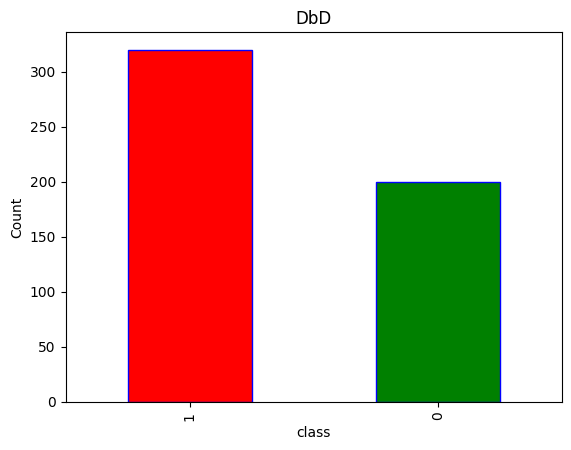

In [ ]:
plt.title('DbD')
plt.xlabel('pos and neg')
plt.ylabel('Count')

dataset['class'].value_counts().plot.bar(color=['red', 'green'],edgecolor='blue')

<Axes: title={'center': 'Polyuria'}, xlabel='Polyuria'>

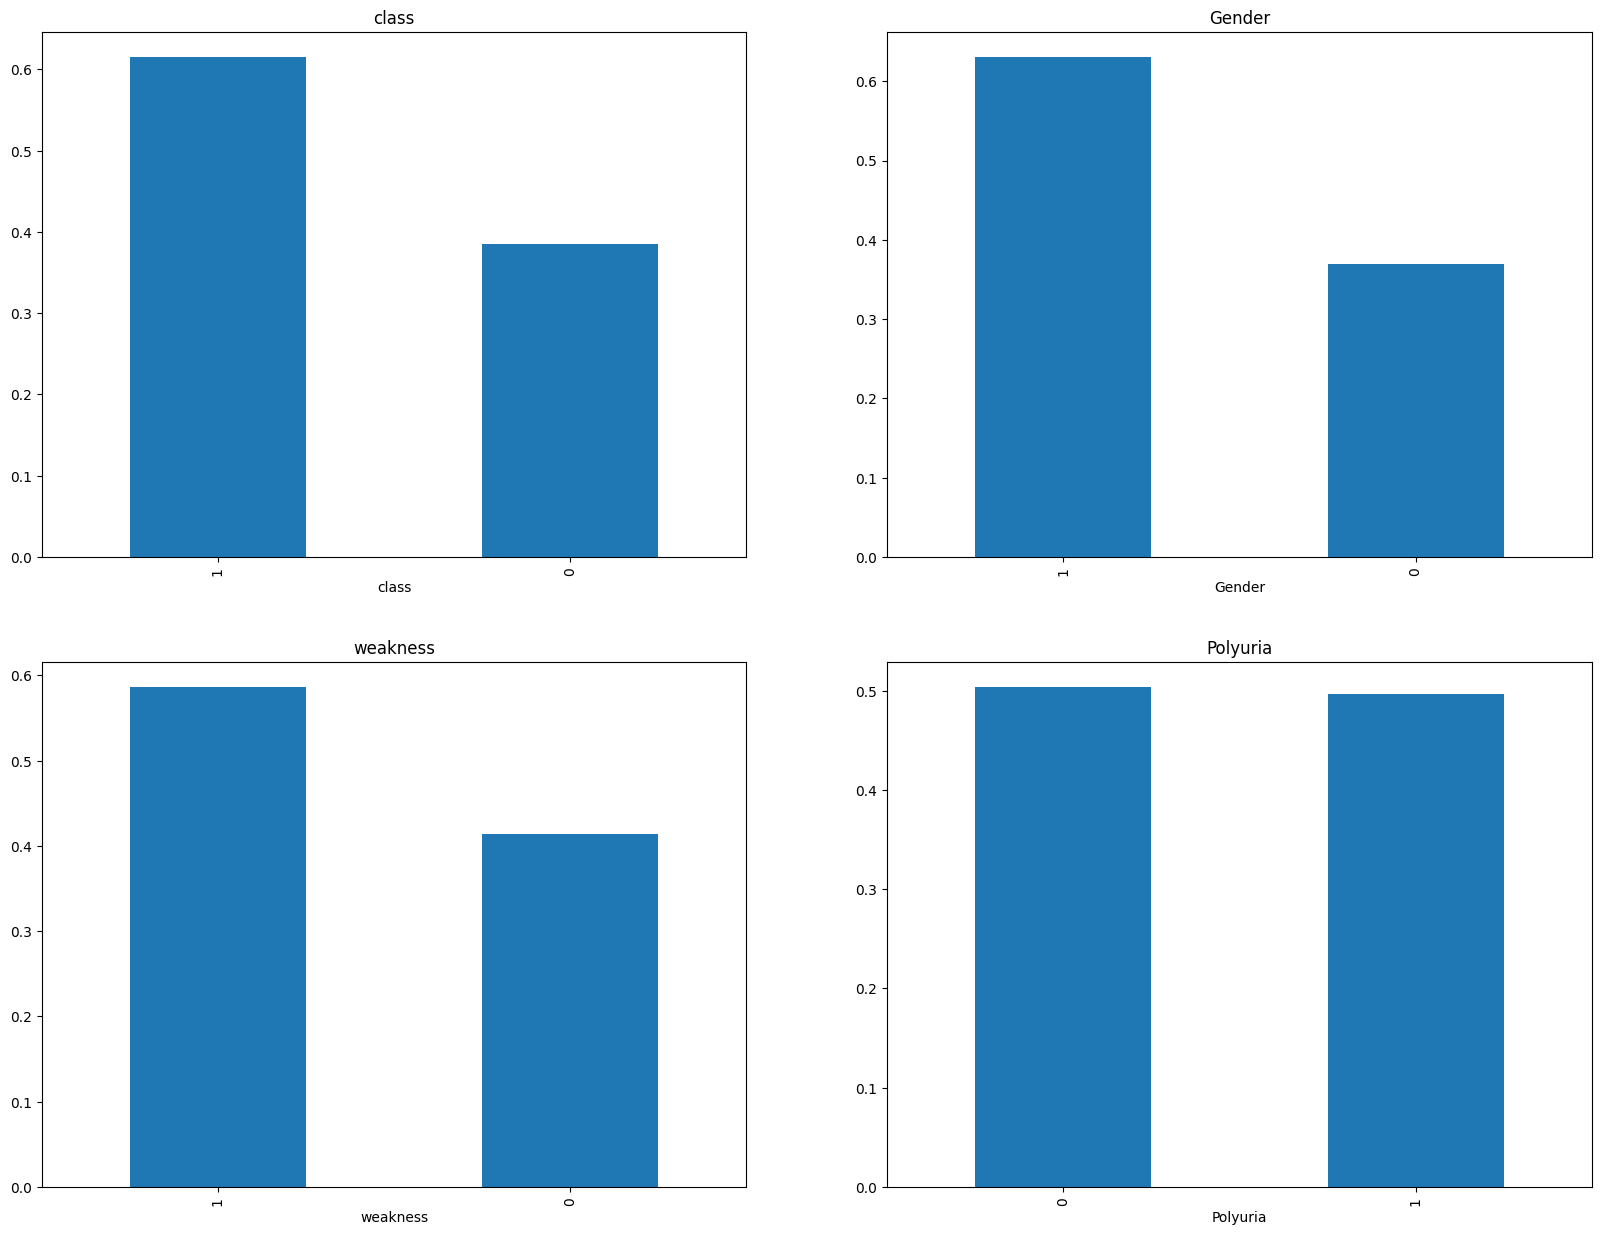

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
dataset['class'].value_counts(normalize=True).plot.bar(title='class')
plt.subplot(2,2,2)
dataset['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.subplot(2,2,3)
dataset['weakness'].value_counts(normalize=True).plot.bar(title='weakness')
plt.subplot(2,2,4)
dataset['Polyuria'].value_counts(normalize=True).plot.bar(title='Polyuria')

<Axes: title={'center': 'Age'}, xlabel='Age'>

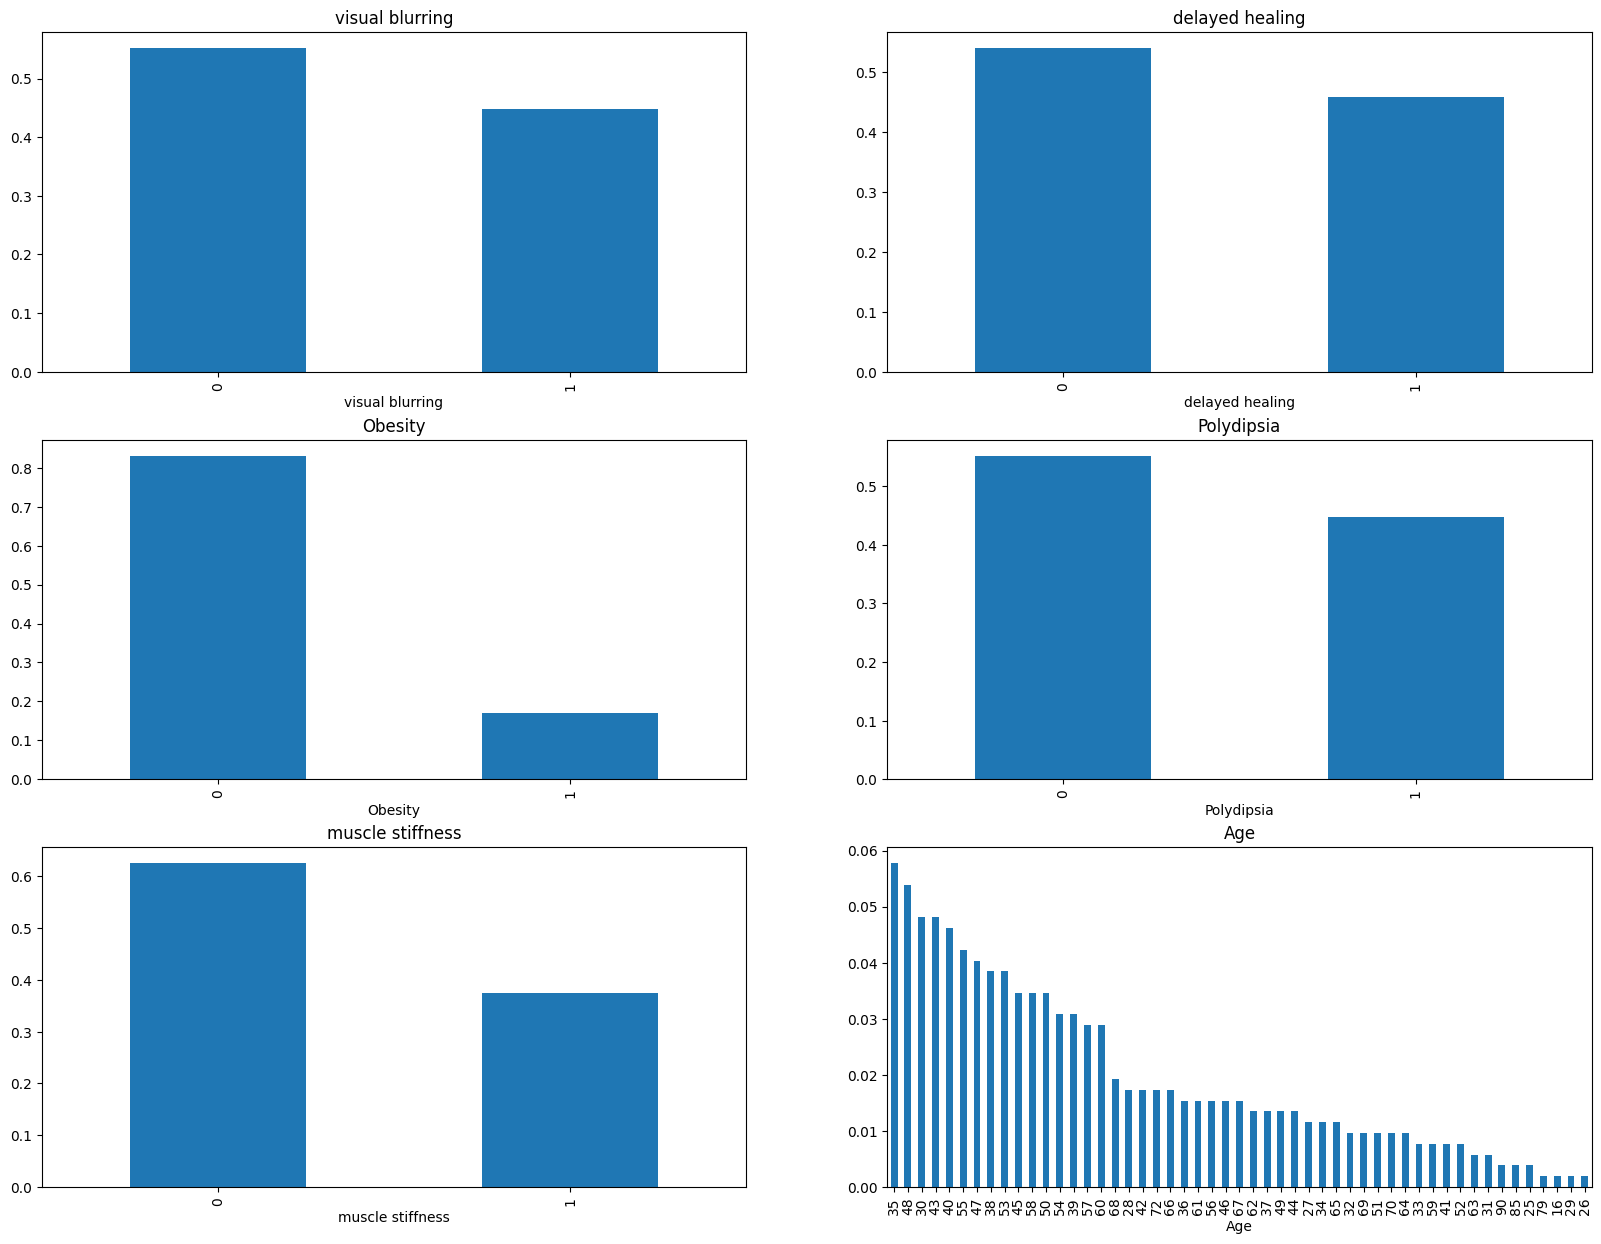

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
dataset['visual blurring'].value_counts(normalize=True).plot.bar(title='visual blurring')
plt.subplot(3,2,2)
dataset['delayed healing'].value_counts(normalize=True).plot.bar(title='delayed healing')
plt.subplot(3,2,3)
dataset['Obesity'].value_counts(normalize=True).plot.bar(title='Obesity')
plt.subplot(3,2,4)
dataset['Polydipsia'].value_counts(normalize=True).plot.bar(title='Polydipsia')
plt.subplot(3,2,5)
dataset['muscle stiffness'].value_counts(normalize=True).plot.bar(title='muscle stiffness')
plt.subplot(3,2,6)
dataset['Age'].value_counts(normalize=True).plot.bar(title='Age')


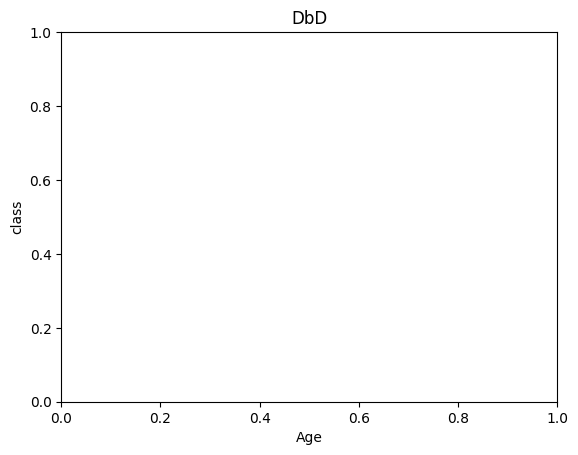

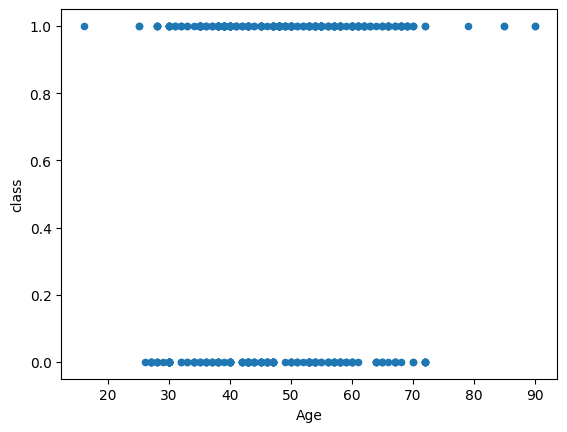

In [ ]:

plt.title('DbD')
plt.xlabel('Age')
plt.ylabel('class')
dataset.plot.scatter(x='Age', y='class')
plt.show()


In [ ]:
labels,counts = pd.factorize(dataset['Obesity'])
counts

Index([1, 0], dtype='int64')

In [ ]:

dataset

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,

In [ ]:
X

array([[40,  1,  0, ...,  1,  1,  1],
       [58,  1,  0, ...,  0,  1,  0],
       [41,  1,  1, ...,  1,  1,  0],
       ...,
       [58,  0,  1, ...,  1,  0,  1],
       [32,  0,  0, ...,  0,  1,  0],
       [42,  1,  0, ...,  0,  0,  0]])

In [ ]:
X = preprocessing.normalize(X)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [ ]:
logistic_Regression = LogisticRegression(max_iter=1000,random_state=0)
logistic_Regression.fit(x_train,y_train)
y_pred = logistic_Regression.predict(x_test)
log = accuracy_score(y_pred,y_test)*100
li = {'Logistic Regression':log}
AccDict.update(li)
print(log)

64.61538461538461


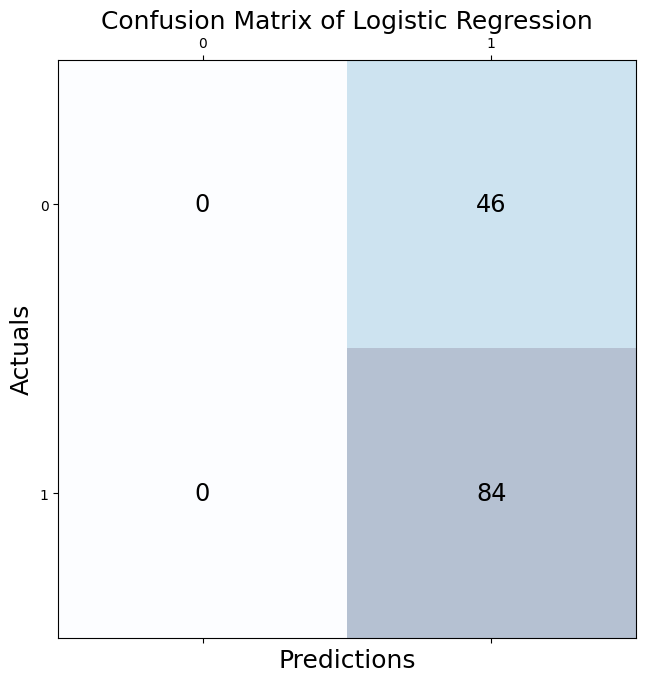

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Logistic Regression', fontsize=18)
plt.show()

In [ ]:
# print(classification_report(y_pred,y_test))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=200)
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
KNN = accuracy_score(pred_knn,y_test)*100
ki = {'KNN before':KNN}
AccDict.update(ki)
print(KNN)


87.6923076923077


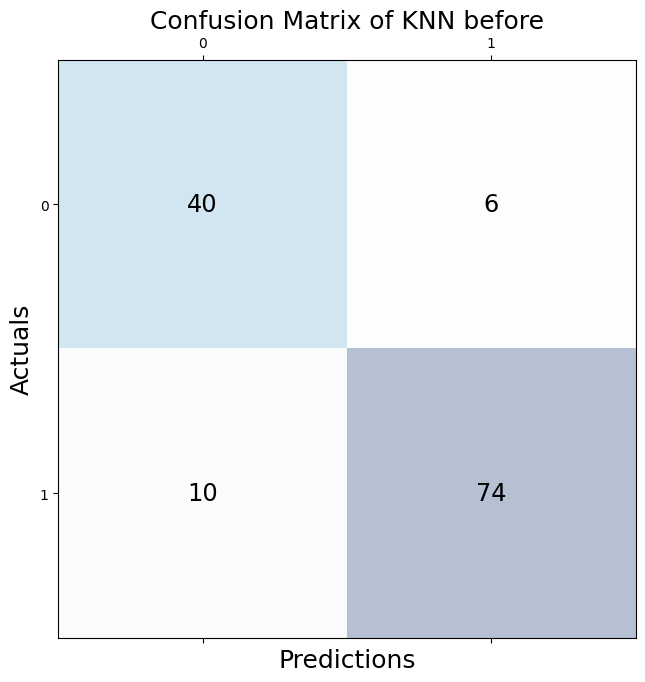

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred_knn)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of KNN before', fontsize=18)
plt.show()

Text(0, 0.5, 'error rate')

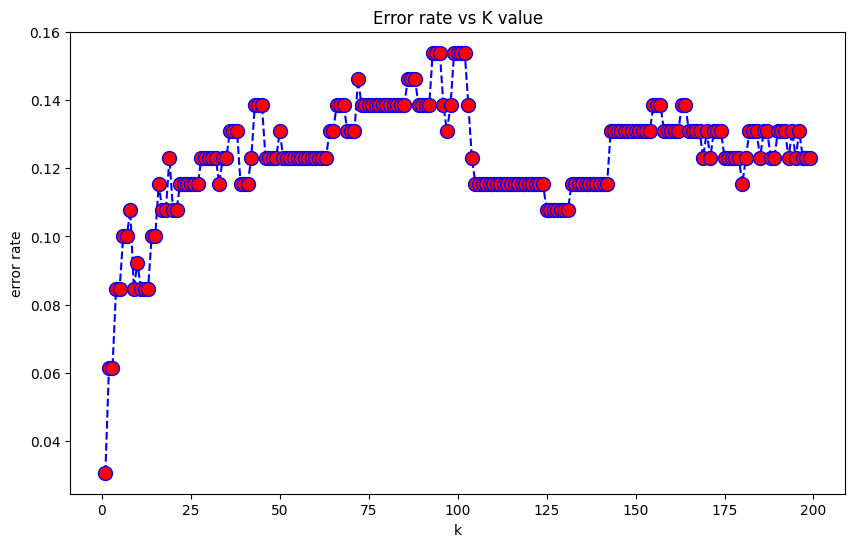

In [ ]:
error=[]
for i in range(1,200):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred1=knn.predict(x_test)
    error.append(np.mean(pred1!=y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,200),error,color='blue',linestyle='dashed',marker = 'o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K value')
plt.xlabel('k')
plt.ylabel('error rate')

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(x_train,y_train)
pred_knn2 = knn2.predict(x_test)
KNN2 = accuracy_score(pred_knn2,y_test)*100
ki2 = {'KNN after':KNN2}
AccDict.update(ki2)
print(KNN2)


91.53846153846153


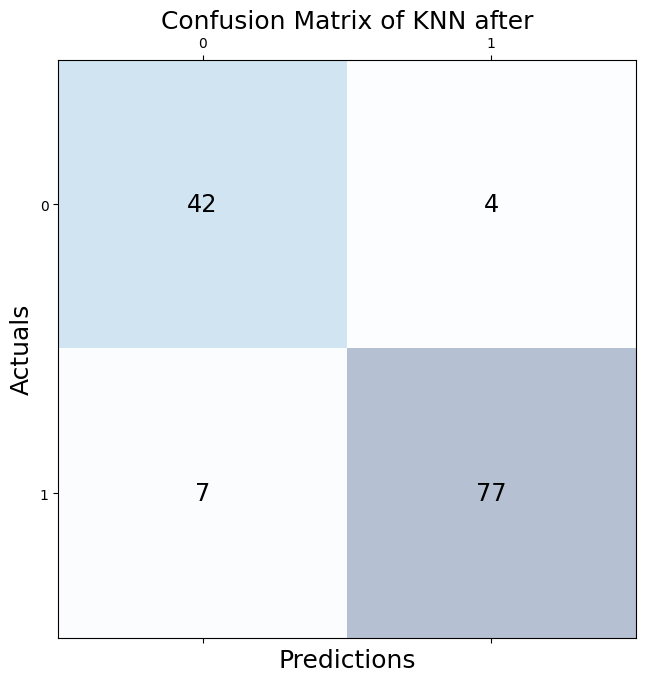

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred_knn2)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of KNN after', fontsize=18)
plt.show()

In [ ]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred_gnb = gnb.predict(x_test)
GNB = accuracy_score(pred_gnb,y_test)*100
gb = {'Naive Bayes':GNB}
AccDict.update(gb)
print(f"classification report of naive bayes is: ")
print(classification_report(y_test,pred_gnb))

classification report of naive bayes is: 
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        46
           1       0.94      0.95      0.95        84

    accuracy                           0.93       130
   macro avg       0.93      0.92      0.92       130
weighted avg       0.93      0.93      0.93       130



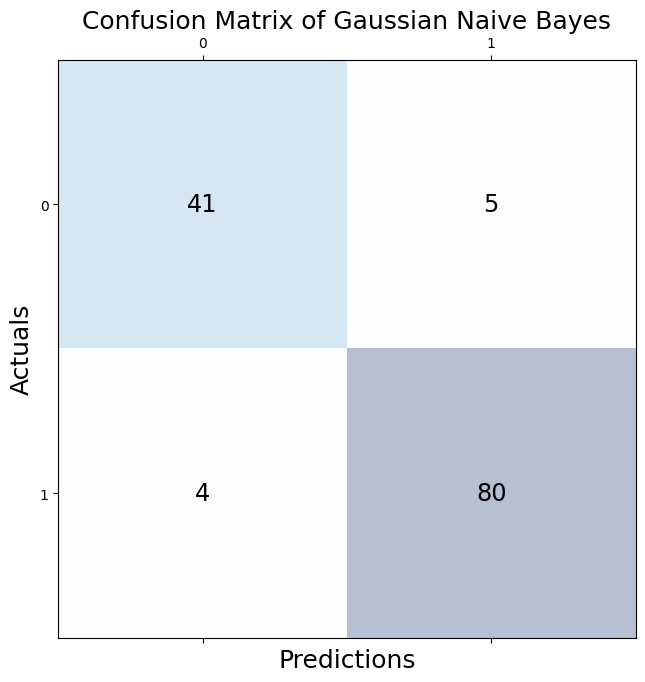

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred_gnb)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Gaussian Naive Bayes', fontsize=18)
plt.show()

In [ ]:
svc = SVC(max_iter=1000,random_state=0)
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
SVC = accuracy_score(pred_svc,y_test)*100
sv = {'SVC':SVC}
AccDict.update(sv)
print(SVC)

64.61538461538461


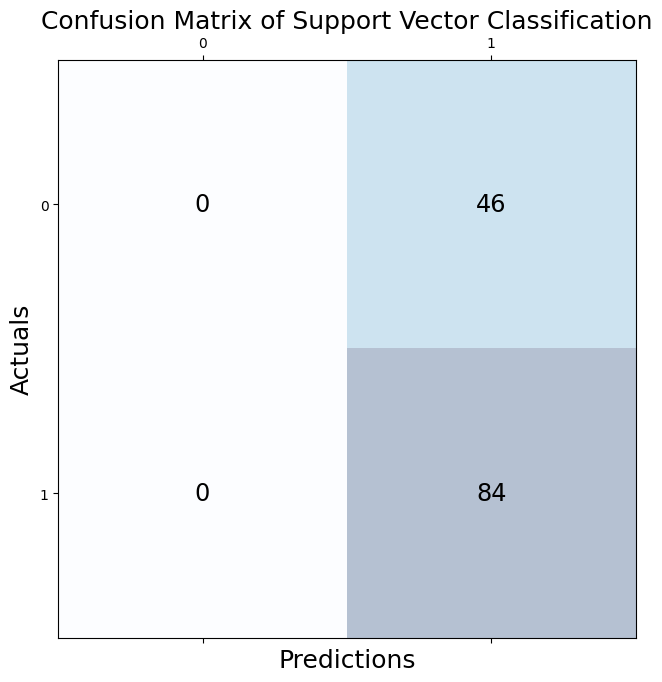

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred_svc)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Support Vector Classification', fontsize=18)
plt.show()

In [ ]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=1,random_state=0)
adaboost = AdaBoostClassifier(n_estimators=80, base_estimator=model,random_state=0)
adaboost.fit(x_train,y_train)
pred = adaboost.predict(x_test)
ada = accuracy_score(y_test,pred)*100
ad = {'adaboost':ada}
AccDict.update(ad)
print(f"classification report of AdaBoost is:")
print(classification_report(y_test,pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


classification report of AdaBoost is:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        46
           1       0.98      0.99      0.98        84

    accuracy                           0.98       130
   macro avg       0.98      0.97      0.97       130
weighted avg       0.98      0.98      0.98       130



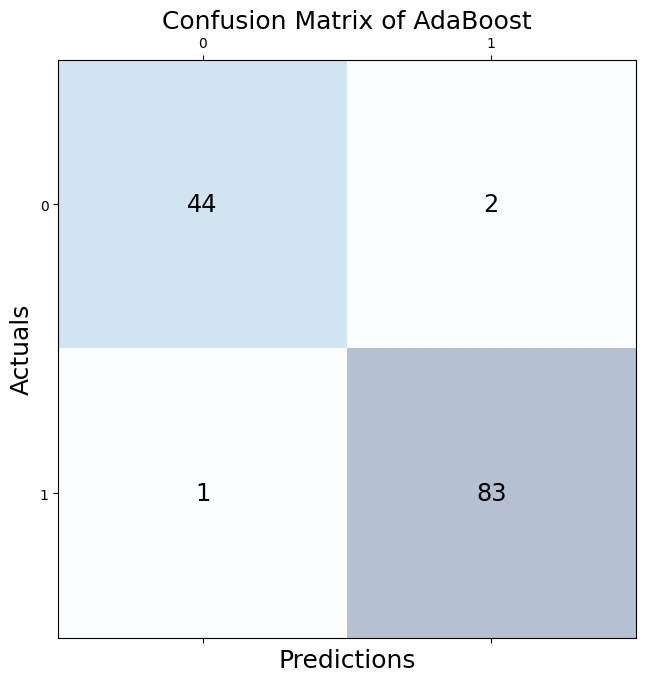

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of AdaBoost', fontsize=18)
plt.show()

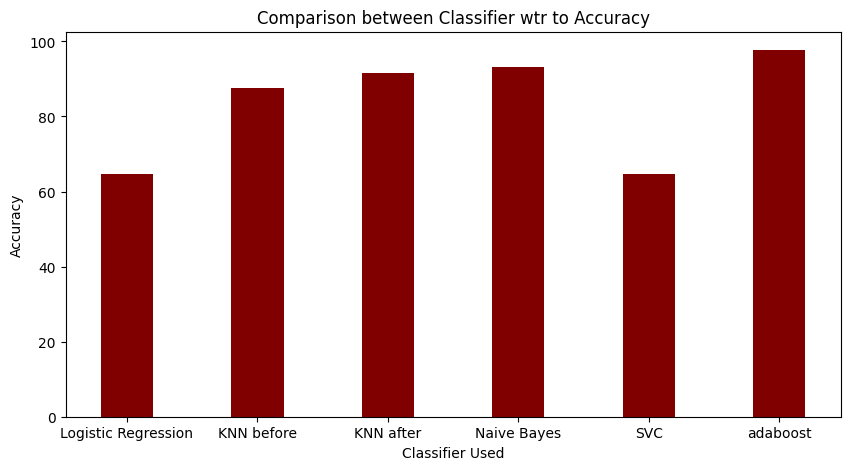

In [ ]:
# creating the dataset
# data = {'C':20, 'C++':15, 'Java':30,
#         'Python':35}
Classifier = list(AccDict.keys())
Accuracy = list(AccDict.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(Classifier, Accuracy, color ='maroon',
        width = 0.4)

plt.xlabel("Classifier Used")
plt.ylabel("Accuracy")
plt.title("Comparison between Classifier wtr to Accuracy")
plt.show()

In [ ]:
# prompt: show the accuracy percentage of logistic regression,svc,knn before,knn after,naive bayes,adaboost

print('Logistic Regression Accuracy:', AccDict['Logistic Regression'])
print('SVC Accuracy:', AccDict['SVC'])
print('KNN before Accuracy:', AccDict['KNN before'])
print('KNN after Accuracy:', AccDict['KNN after'])
print('Naive Bayes Accuracy:', AccDict['Naive Bayes'])
print('AdaBoost Accuracy:', AccDict['adaboost'])


Logistic Regression Accuracy: 64.61538461538461
SVC Accuracy: 64.61538461538461
KNN before Accuracy: 87.6923076923077
KNN after Accuracy: 91.53846153846153
Naive Bayes Accuracy: 93.07692307692308
AdaBoost Accuracy: 97.6923076923077


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
print(model.predict(([[39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0]])))

[1]


In [ ]:
import pickle
with open('classifier.pkl','wb') as file:
  pickle.dump(model, file)
with open('classifier.pkl','rb') as file:
  clf = pickle.load(file)
prediction = clf.predict([[39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0]])
prediction

array([1])